# Task # 4 - To Explore Decision Tree Algorithm


### 1. Defining the problem statement

*For the given ‘Iris’ dataset, create the Decision Tree classifier and
visualize it graphically. The purpose is if we feed any new data to this
classifier, it would be able to predict the right class accordingly.*

In [1]:
from IPython.display import Image
Image(url= "https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png")

### 2. Collecting the data
training data set and testing data set are avaliable in the sklearn datasets.we can directly load the dataset.

In [2]:
from sklearn.datasets import load_iris
#load the dataset
data_raw= load_iris()
data_raw


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

### 3. Exploratory data analysis

In [3]:
#converting data into dataframe
import seaborn as sb
data=sb.load_dataset("iris")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
#data for traing and testing
#data_x represents the data required for building the decision tree
import pandas as pd
data_x=pd.DataFrame(data_raw.data,columns=data_raw.feature_names)
data_x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
#data for test and training encoded or converted
#data y represents the target variable or the decision
data_y=pd.DataFrame(data_raw.target,columns=["species"])

data_y


,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


We can see the data type of various columns

In [7]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We can see various statistical descriptin of the data

In [8]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

As we can see there are no null values

 
**0-'setosa'**

**1-'versicolor'**

**2-'virginica'**

### 4] Visulization of the data

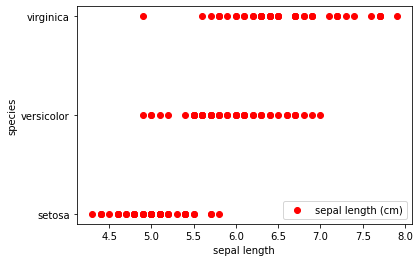

In [9]:
import matplotlib.pyplot as plt
#plotting a graph 
%matplotlib inline
plt.ylabel('species')
plt.xlabel('sepal length')
plt.scatter(data_x[("sepal length (cm)")],data[("species")],label="sepal length (cm)",color="red")

plt.legend()


**Insights gained**

This graph represents the distribution of the sepal lenght of the data set with respect to their target

As we can see the 'setosa' species sepal lenght lies between 4 to 6 

As we can see the 'versicolor' species sepal lenght lies between 4.7 to 7.3 

As we can see the 'virginica' species sepal lenght lies between 5.5 to 8 


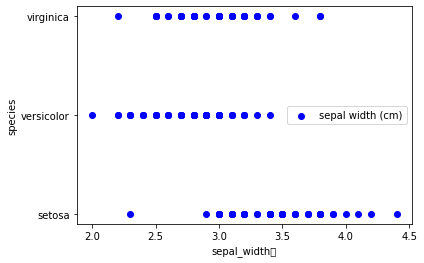

In [14]:
import matplotlib.pyplot as plt
#plotting a graph 
%matplotlib inline
plt.ylabel('species')
plt.xlabel('sepal_width	')
plt.scatter(data_x[("sepal width (cm)")],data[("species")],label="sepal width (cm)",color="blue")
plt.legend()

**Insights gained**

This graph represents the distribution of the sepal width of the data set with respect to their target

As we can see the 'setosa' species sepal width lies between 2.9 to 4.5 

As we can see the 'versicolor' species sepal width  lies between 2 to 3.5 

As we can see the 'virginica' species sepal width lies between 2.5 to 4

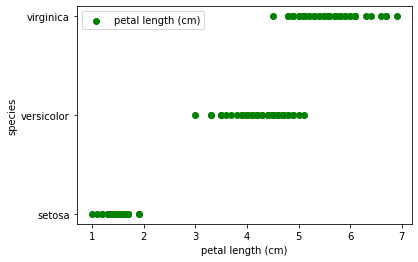

In [11]:
import matplotlib.pyplot as plt
#plotting a graph 
%matplotlib inline
plt.ylabel('species')
plt.xlabel('petal length (cm)')
plt.scatter(data_x[("petal length (cm)")],data[("species")],label="petal length (cm)",color="green")
plt.legend()

**Insights gained**

This graph represents the distribution of the petal lenght of the data set with respect to their target

As we can see the 'setosa' species petal lenght lies between 1 to 2 

As we can see the 'versicolor' petal sepal lenght lies between 3 to 5.5 

As we can see the 'virginica' species petal lenght lies between 4.5 to 7 

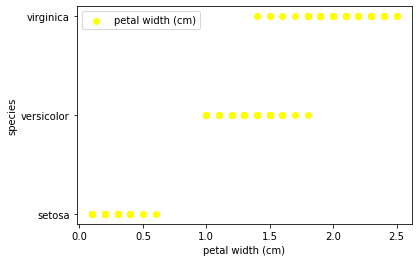

In [12]:
import matplotlib.pyplot as plt
#plotting a graph 
%matplotlib inline
plt.ylabel('species')
plt.xlabel('petal width (cm)')
plt.scatter(data_x[("petal width (cm)")],data[("species")],label="petal width (cm)",color="yellow")
plt.legend()

**Insights gained**

This graph represents the distribution of the petal width of the data set with respect to their target

As we can see the 'setosa' species petal width lies between 0.1 to 0.6 

As we can see the 'versicolor' petal sepal width  lies between 1 to 1.9 

As we can see the 'virginica' petal sepal width lies between 1.5 to 2.5

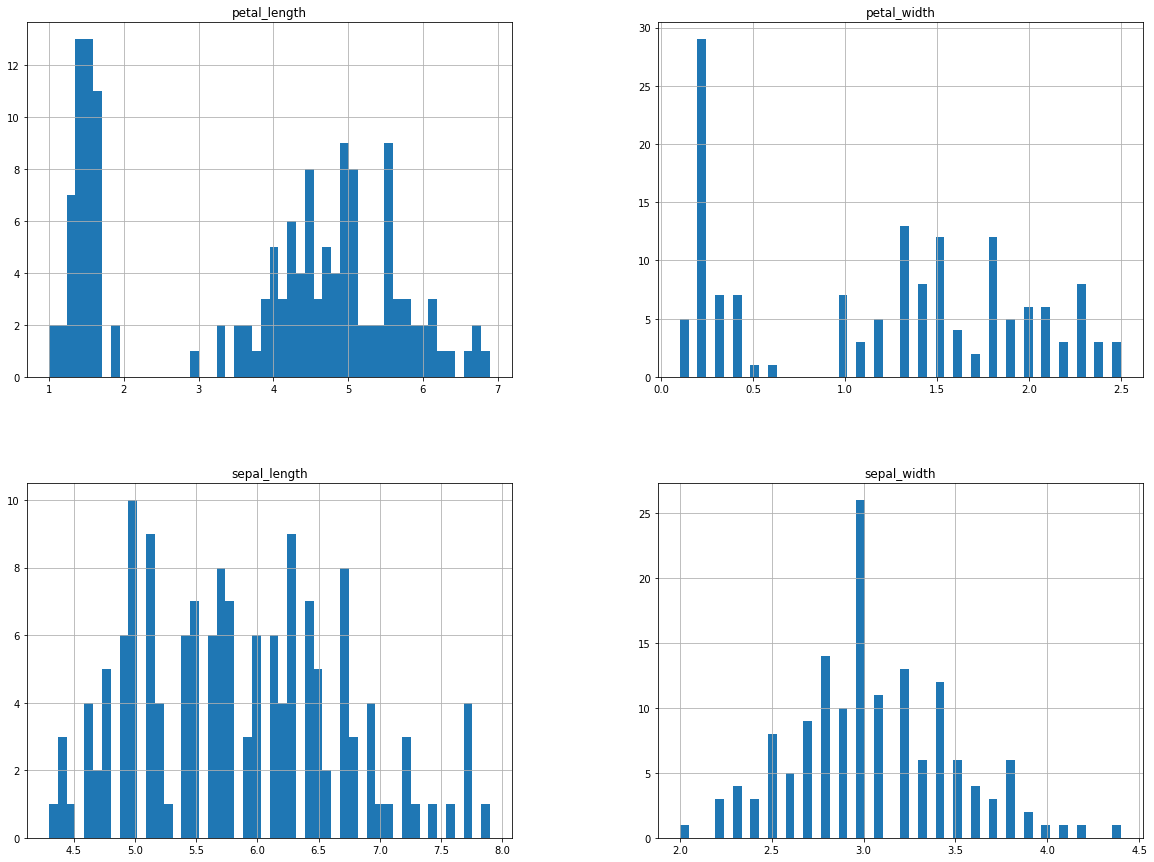

In [13]:
data.hist(bins=50, figsize=(20,15))
plt.show()

The above graph represents the distribution of various columns 

### 5]Creating a decision tree

In [15]:
# Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()

In [17]:
#First we split the data into training and testing data to evaluate the performance of our model
#splitting the data into testing and traingin datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data_x,data[("species")],random_state=42,test_size=0.2)

In [18]:
x_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [19]:
x_train.shape

(120, 4)

In [20]:
x_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4
31,5.4,3.4,1.5,0.4
64,5.6,2.9,3.6,1.3
141,6.9,3.1,5.1,2.3
68,6.2,2.2,4.5,1.5
82,5.8,2.7,3.9,1.2


In [21]:
x_test.shape

(30, 4)

As expected and mentioned 20% of our total data is used for testing

In [22]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [23]:
y_pred=dtree.predict(x_test)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [34]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
score

1.0

As we can see we have **100%** acuraccy

### 6]visualize the Decision Tree to understand it better.

[Text(429.2307692307692, 504.7714285714286, 'X[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(321.9230769230769, 427.11428571428576, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(536.5384615384615, 427.11428571428576, 'X[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(214.6153846153846, 349.4571428571429, 'X[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(107.3076923076923, 271.8, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(321.9230769230769, 271.8, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(858.4615384615385, 349.4571428571429, 'X[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(536.5384615384615, 271.8, 'X[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(429.2307692307692, 194.14285714285717, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(643.8461538461538, 194.14285714285717, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(536.5384

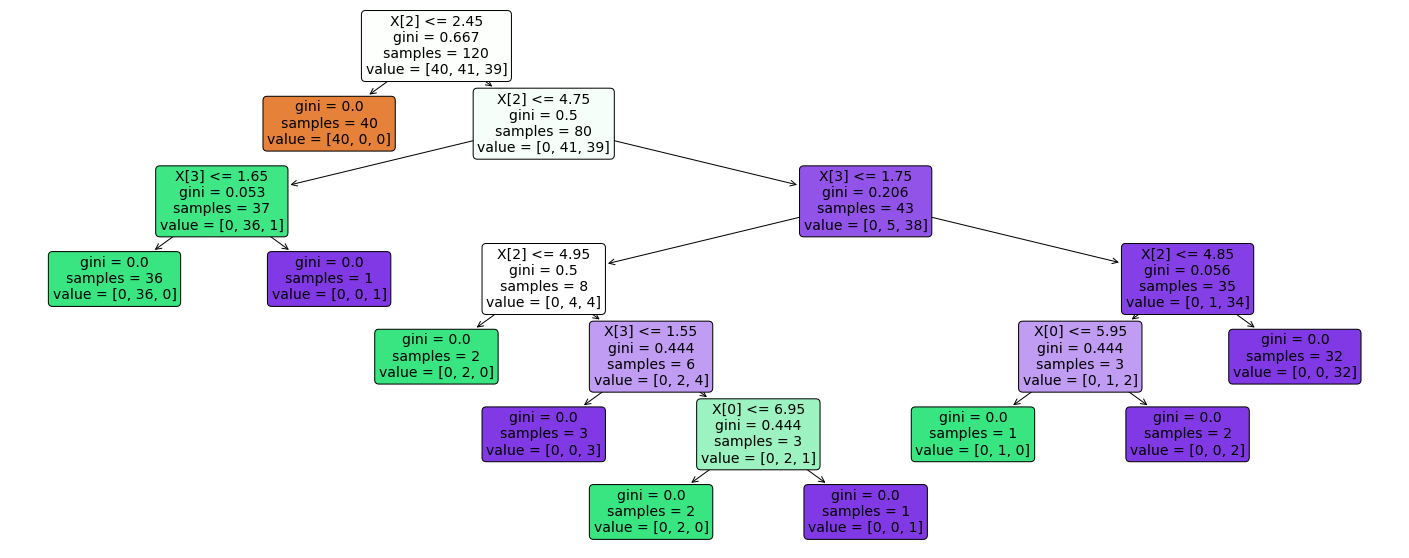

In [43]:
from sklearn import tree
plt.figure(figsize=(25,10))
tree.plot_tree(dtree, filled=True, 
              rounded=True, 
              fontsize=14)